**SIMPLE LINEAR REGRESSION**

Simple Linear Regression (SLR) is a statistical method used to model the relationship between a single independent variable (predictor) and a dependent variable (outcome) by fitting a linear equation to the observed data. 

The goal is to find the best-fitting line that minimizes the sum of squared differences between the predicted and actual values. 

SLR helps quantify and understand the linear association between variables, making it a useful tool for predicting outcomes based on a single input variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Q1

In [2]:
data_1 = pd.read_csv("D:\YUKTA\Assignment\DS\Simple Linear Regression\delivery_time.csv")

In [3]:
data_1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


**EDA: Exploratory Data Analysis:**

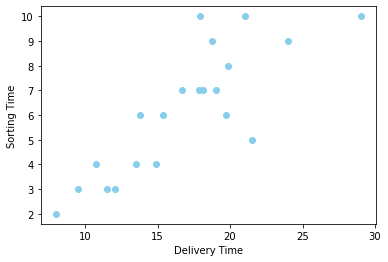

In [5]:
plt.scatter(data_1['Delivery Time'],data_1['Sorting Time'],color='skyblue')
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.show()

Correlation:

In [6]:
data_1.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


The correlation coefficient between "Delivery Time" and "Sorting Time" is approximately 0.826. This suggests a strong positive linear correlation between the two variables. 

**As "Sorting Time" increases, there is a tendency for "Delivery Time" to also increase.**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

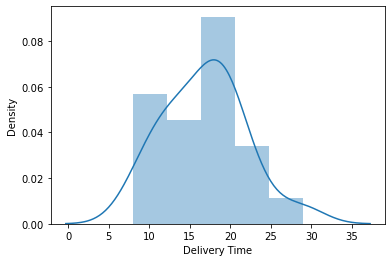

In [7]:
sns.distplot(data_1['Delivery Time'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

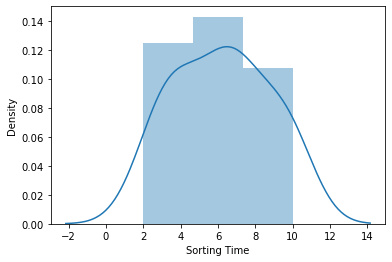

In [8]:
sns.distplot(data_1['Sorting Time'])

In [9]:
data_1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


**Delivery Time:**

The average (mean) delivery time is approximately 16.79 units.

The delivery times range from a minimum of 8 units to a maximum of 29 units.

The standard deviation is 5.07 units, indicating a moderate amount of variability around the mean.

**Sorting Time:**

The average (mean) sorting time is around 6.19 units.

Sorting times range from a minimum of 2 units to a maximum of 10 units.

The standard deviation is 2.54 units, suggesting a relatively lower variability compared to delivery time.

**To fit SLR model**

In [10]:
x = data_1[['Sorting Time']]
y = data_1['Delivery Time']

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(x,y)

LinearRegression()

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

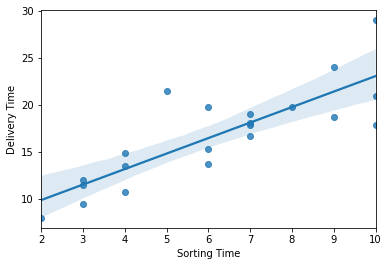

In [14]:
sns.regplot(x="Sorting Time", y="Delivery Time", data = data_1)

In [15]:
y_pred = model.predict(x)
print('The predicted y values are: \n',y_pred)

The predicted y values are: 
 [23.07293294 13.17881356 16.47685335 21.42391304 23.07293294 16.47685335
 18.12587325 11.52979366 23.07293294 21.42391304 19.77489315 13.17881356
 18.12587325 11.52979366 11.52979366 13.17881356 16.47685335 18.12587325
  9.88077377 18.12587325 14.82783346]


In [16]:
a = model.intercept_
b = model.coef_

print(f'Intercept = {a:.4f}')
print(f'Coefficient = {b}')

Intercept = 6.5827
Coefficient = [1.6490199]


**The SLR model is:**

Delivery Time = 6.5827 + 1.649 * Sorting Time

**Model Evaluation**

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y,y_pred)

print(f'Mean squared error: {mse:.2f}')
print("Original RMSE:", rmse)
print(f'R-squared: {r2:.2f}')

Mean squared error: 7.79
Original RMSE: 2.7916503270617654
R-squared: 0.68


The Simple Linear Regression model has a Mean Squared Error of 7.79 and R-squared value of 0.68.

The R-square value indicates that 68% of variability in **Delivery Time** can be explained by the **Sorting Time**.

Thus there is a moderate level of predictive capability in the model.

# _Transformations_

In [19]:
x = data_1[['Sorting Time']]
y = data_1['Delivery Time']

**1) Log Transformation**

In [20]:
x_log = np.log(x)
model_log_transformed = model.fit(x_log, y)

y_pred_log_transformed = model_log_transformed.predict(x_log)

rmse_log_transformed = np.sqrt(mean_squared_error(y,y_pred_log_transformed))
print("RMSE after log transformation:", rmse_log_transformed)

r2_log_transformed  = r2_score(y,y_pred_log_transformed)
print(f'R-squared_log_transformed: {r2_log_transformed:.2f}')

RMSE after log transformation: 2.733171476682066
R-squared_log_transformed: 0.70


**2) Square Transformation**

In [21]:
x_square = x**2
model_square_transformed = model.fit(x_square, y)

y_pred_square_transformed = model_square_transformed.predict(x_square)

rmse_square_transformed = np.sqrt(mean_squared_error(y,y_pred_square_transformed))
print("RMSE after Square transformation:", rmse_square_transformed)

r2_square_transformed  = r2_score(y,y_pred_square_transformed)
print(f'R-squared_square_transformed: {r2_square_transformed:.2f}')

RMSE after Square transformation: 3.011377282646288
R-squared_square_transformed: 0.63


**3) Square-root Transformation**

In [22]:
x_sqrt = np.sqrt(x)
model_sqrt_transformed = model.fit(x_sqrt, y)

y_pred_sqrt_transformed = model_sqrt_transformed.predict(x_sqrt)

rmse_sqrt_transformed = np.sqrt(mean_squared_error(y,y_pred_sqrt_transformed))
print("RMSE after Square-root transformation:", rmse_sqrt_transformed)

r2_sqrt_transformed  = r2_score(y,y_pred_sqrt_transformed)
print(f'R-squared_sqrt_transformed: {r2_sqrt_transformed:.2f}')

RMSE after Square-root transformation: 2.7315432100912105
R-squared_sqrt_transformed: 0.70


In [23]:
results = pd.DataFrame({
    'Transformation': ['None', 'Log', 'Square', 'Square Root'],
    'RMSE values': [rmse, rmse_log_transformed, rmse_square_transformed, rmse_sqrt_transformed],
    'R-squared values': [r2, r2_log_transformed, r2_square_transformed, r2_sqrt_transformed]
})

print(results)

  Transformation  RMSE values  R-squared values
0           None     2.791650          0.682271
1            Log     2.733171          0.695443
2         Square     3.011377          0.630287
3    Square Root     2.731543          0.695806


# Q2

In [24]:
data_2 = pd.read_csv("D:\YUKTA\Assignment\DS\Simple Linear Regression\Salary_Data.csv")

In [25]:
data_2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [26]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


**EDA: Exploratory Data Analysis**

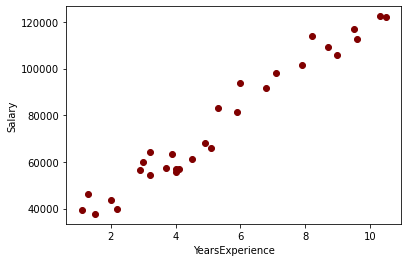

In [27]:
plt.scatter(data_2['YearsExperience'],data_2['Salary'],color='maroon')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

Correlation:

In [28]:
data_2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


The correlation coefficient between "Salary" and "YearExperience" is approximately 0.9782. This suggests a strong positive linear correlation between the two variables.

As "Years of experience" increases, there is a tendency for "Salary" to also increase.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

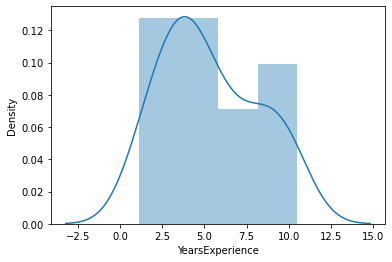

In [29]:
sns.distplot(data_2['YearsExperience'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

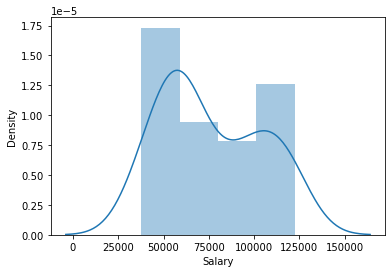

In [30]:
sns.distplot(data_2['Salary'])

In [31]:
data_2.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


On average, individuals in the dataset have around 5.31 years of experience, with a mean salary of $76,003.

**To fit SLR model**

In [32]:
x = data_2[['YearsExperience']]
y = data_2['Salary']

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [34]:
model.fit(x,y)

LinearRegression()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

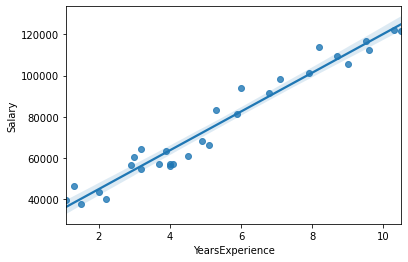

In [35]:
sns.regplot(x="YearsExperience", y="Salary", data = data_2)

In [36]:
y_pred = model.predict(x)
print('The predicted y values are: \n',y_pred)

The predicted y values are: 
 [ 36187.15875227  38077.15121656  39967.14368085  44692.12484158
  46582.11730587  53197.09093089  54142.08716303  56032.07962732
  56032.07962732  60757.06078805  62647.05325234  63592.04948449
  63592.04948449  64537.04571663  68317.03064522  72097.0155738
  73987.00803809  75877.00050238  81546.97789525  82491.9741274
  90051.94398456  92886.932681   100446.90253816 103281.8912346
 108006.87239533 110841.86109176 115566.84225249 116511.83848464
 123126.81210966 125016.80457395]


In [37]:
a = model.intercept_
b = model.coef_

print(f'Intercept = {a:.4f}')
print(f'Coefficient = {b}')

Intercept = 25792.2002
Coefficient = [9449.96232146]


**The SLR model is:**

Salary = 25792.2002 + 9449.9623 * YearsExperience

**Model Evaluation**

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
mse = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)

print(f'Mean squared error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean squared error: 31270951.72
R-squared: 0.96


The Simple Linear Regression model has a Mean Squared Error of 31270951.72 and R-squared value of 0.96.

The R-square value indicates that 96% of variability in **Salary** can be explained by the **Years of Experience**.

Thus there is a strong predictive capability in the model.

# _Transformations_

In [40]:
x = data_2[['YearsExperience']]
y = data_2['Salary']

**1) Log Transformation** 

In [41]:
x_log = np.log(x)
model_log_transformed = model.fit(x_log, y)

y_pred_log_transformed = model_log_transformed.predict(x_log)

rmse_log_transformed = np.sqrt(mean_squared_error(y,y_pred_log_transformed))
print("RMSE after log transformation:", rmse_log_transformed)

r2_log_transformed  = r2_score(y,y_pred_log_transformed)
print(f'R-squared_log_transformed: {r2_log_transformed:.2f}')

RMSE after log transformation: 10302.893706228302
R-squared_log_transformed: 0.85


**2) Square Transformation**

In [42]:
x_square = x**2
model_square_transformed = model.fit(x_square, y)

y_pred_square_transformed = model_square_transformed.predict(x_square)

rmse_square_transformed = np.sqrt(mean_squared_error(y,y_pred_square_transformed))
print("RMSE after Square transformation:", rmse_square_transformed)

r2_square_transformed  = r2_score(y,y_pred_square_transformed)
print(f'R-squared_square_transformed: {r2_square_transformed:.2f}')

RMSE after Square transformation: 7843.471199698867
R-squared_square_transformed: 0.92


**3) Square-Root Transformation**

In [43]:
x_sqrt = np.sqrt(x)
model_sqrt_transformed = model.fit(x_sqrt, y)

y_pred_sqrt_transformed = model_sqrt_transformed.predict(x_sqrt)

rmse_sqrt_transformed = np.sqrt(mean_squared_error(y,y_pred_sqrt_transformed))
print("RMSE after Square-root transformation:", rmse_sqrt_transformed)

r2_sqrt_transformed  = r2_score(y,y_pred_sqrt_transformed)
print(f'R-squared_sqrt_transformed: {r2_sqrt_transformed:.2f}')

RMSE after Square-root transformation: 7080.095734983039
R-squared_sqrt_transformed: 0.93


In [44]:
results = pd.DataFrame({
    'Transformation': ['None', 'Log', 'Square', 'Square Root'],
    'RMSE values': [rmse, rmse_log_transformed, rmse_square_transformed, rmse_sqrt_transformed],
    'R-squared values': [r2, r2_log_transformed, r2_square_transformed, r2_sqrt_transformed]
})

print(results)

  Transformation   RMSE values  R-squared values
0           None      2.791650          0.956957
1            Log  10302.893706          0.853889
2         Square   7843.471200          0.915320
3    Square Root   7080.095735          0.931001
